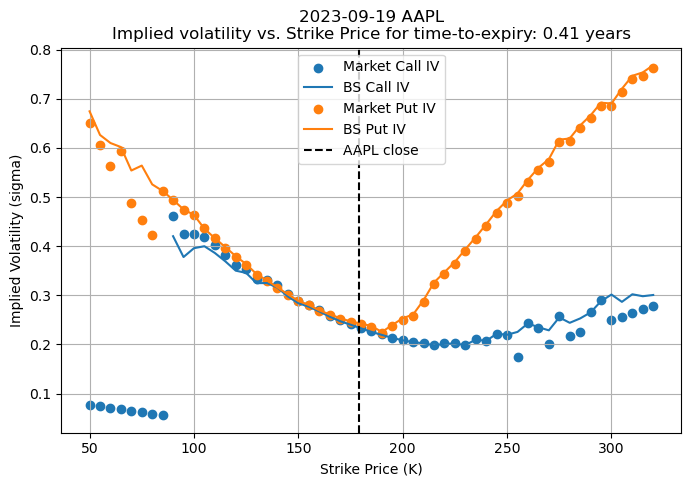

In [6]:
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from options_market_maker.pricing.implied_volatility import implied_volatility


ROOT_DIR = Path.cwd().parents[1]
symbol = 'AAPL'
date = '2023-09-19'
samples_path = ROOT_DIR / f'data/samples/options/{symbol}/{symbol}_{date}.json'
samples = json.loads(samples_path.read_text())

S = samples['symbol_close']
n = samples['ncalls'] // 2
expiration = samples['calls'][n]['expiration']
T = samples['calls'][n]['time-to-expiry']
r = 0.055   # risk-free rate is hard coded for now

call_strikes = []
call_iv = []
bs_call_iv = []
for call in samples['calls']:
    if call['expiration'] == expiration:
        call_strikes.append(call['strike'])
        call_iv.append(call['implied_volatility'])
        price = (call['bid'] + call['ask']) / 2
        iv = implied_volatility(price, S, call_strikes[-1], T, r, 'call')
        bs_call_iv.append(iv)

put_strikes = []
put_iv = []
bs_put_iv = []
for put in samples['puts']:
    if put['expiration'] == expiration:
        put_strikes.append(put['strike'])
        put_iv.append(put['implied_volatility'])
        price = (put['bid'] + put['ask']) / 2
        iv = implied_volatility(price, S, put_strikes[-1], T, r, 'put')
        bs_put_iv.append(iv)

plt.figure(figsize=(8,5))

plt.scatter(call_strikes, call_iv, marker='o', label='Market Call IV')
plt.plot(call_strikes, bs_call_iv, linestyle='-', label='BS Call IV')

plt.scatter(put_strikes, put_iv, marker='o', label='Market Put IV')
plt.plot(call_strikes, bs_put_iv, linestyle='-', label='BS Put IV')

plt.axvline(S, color='black', linestyle='--', label=f'{symbol} close')

plt.xlabel('Strike Price (K)')
plt.ylabel('Implied Volatility (sigma)')
plt.title(f'{date} {symbol}\nImplied volatility vs. Strike Price for time-to-expiry: {T:.2f} years')
plt.grid()
plt.legend(loc='best')
plt.show()